In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def sind(x):
    I = x/180.
    sind = sin(I * pi)
    mask = (I == trunc(I)) & isfinite(I)
    return sind

def cosd(x):
    I = x/180.
    cosd = cos(I * pi)
    mask = (I == trunc(I)) & isfinite(I)
    return cosd

In [3]:
phi = 48          # latitude
Omega = 7.29e-5   # angular velocity
gg = 9.8
RR = 6370e3    # Earth radius
hh = 4000      # water depth

ff = 2*Omega* sind(phi)     # Coriolis parameter
bb = 2* Omega/RR*cosd(phi)  # beta
cc = sqrt(gg*hh)            # shallow water phase speed
LL = cc/ff                  # Rossby radius

In [4]:
kx_min = -3.5
kx_max = 0
ky_min = -3.5
ky_max = 3.5

NX = 500   # number of data points in x-direction
NY = 2*NX  # number of data points in y-direction
kx = linspace(kx_min,kx_max,NX)*1.0/LL
ky = linspace(ky_min,ky_max,NY)*1.0/LL

kxLL = kx*LL
kyLL = ky*LL

In [10]:
omega = zeros((NX, NY))
for i in range(NX):
    for j in range(NY):
        omega[i,j] = -bb*kx[i]/(kx[i]**2 + ky[j]**2 + LL**(-2))

In [11]:
from mpl_toolkits.mplot3d import Axes3D

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


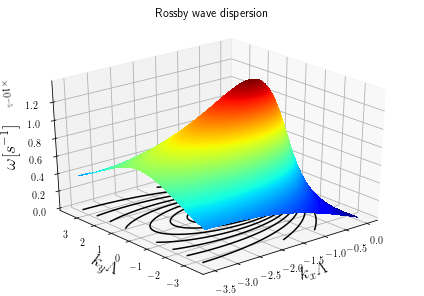

In [12]:
x=kxLL
y=kyLL
X, Y = meshgrid(x, y)
Z=transpose(omega)
fig = figure()
rcParams.update({'font.size': 10, 'text.usetex': True})
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z ,cmap=cm.jet,rstride=1,cstride=1,linewidth=0,antialiased=False)
ax.ticklabel_format(style='sci', axis='z',  scilimits=(0,0),useOffset=0)
cont=linspace(2,16,15)
cont_val = cont*1e-6
ax.contour(X, Y, Z,cont_val, lw=3, colors='k', linestyles="solid",offset=0)
ax.set_xlabel(r'$k_x \Lambda$',fontsize=18)
ax.set_ylabel(r'$k_y \Lambda$',fontsize=18)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel(r'$\omega [s^{-1}]$',fontsize=18,rotation=90)
ax.view_init(elev=30, azim=-130)
ax.xaxis._axinfo['label']['space_factor'] = 1
ax.yaxis._axinfo['label']['space_factor'] = 1
ax.zaxis._axinfo['label']['space_factor'] = 1
tight_layout()
title('Rossby wave dispersion')
show()

In [13]:
import random

In [14]:
NSub=100
ii_sub = random.sample(range(NX),NSub)
jj_sub =  random.sample(range(NY),NSub)
X_sub=zeros(NSub)
Y_sub=zeros(NSub)
for i in range(NSub):
    X_sub[i] = kxLL[ii_sub[i]]
    Y_sub[i]=  kyLL[jj_sub[i]]
Z_sub = zeros((NSub))
for i in range(NSub):
    Z_sub[i] = omega[ii_sub[i],jj_sub[i]]

Text(0.5, 1.0, 'Data points (N=100)')

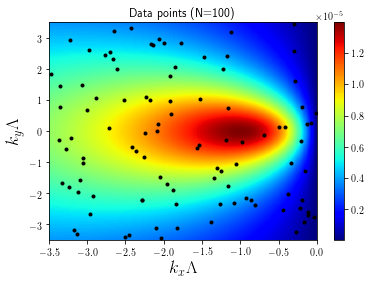

In [15]:
pcolor(X, Y, Z, cmap='jet')
cb=colorbar()
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plot(X_sub,Y_sub,'k.') 
xlabel(r'$k_x \Lambda$',fontsize=18)
ylabel(r'$k_y \Lambda$',fontsize=18)
ylim(-3.5,3.5)
title('Data points (N=%s)'%NSub)

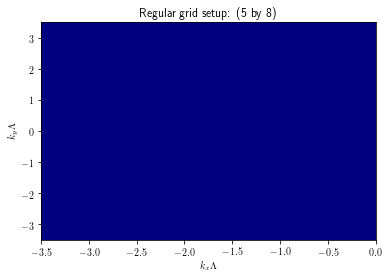

In [16]:
NX_int_B = 5
NY_int_B = 8
XX_int_B = linspace(kx_min,kx_max,NX_int_B)
YY_int_B = linspace(ky_min,ky_max,NY_int_B)
[XX_int_grid_B,YY_int_grid_B] = meshgrid(XX_int_B,YY_int_B)
pcolor(XX_int_grid_B,YY_int_grid_B,ones((NY_int_B,NX_int_B)),cmap='jet')
title(('Regular grid setup: (%s by %s)'%(NX_int_B,NY_int_B)))
xlabel(r'$k_x \Lambda$')
ylabel(r'$k_y \Lambda$')
ylim(-3.5,3.5)
show()

In [17]:
NX_int = 100
NY_int = 200
XX_int = linspace(kx_min,kx_max,NX_int)
YY_int = linspace(ky_min,ky_max,NY_int)
[XX_int_grid,YY_int_grid] = meshgrid(XX_int,YY_int)

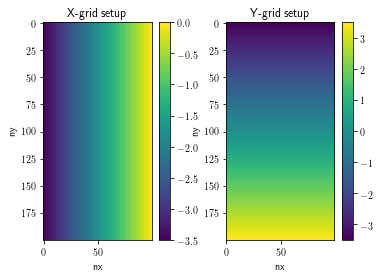

In [18]:
subplot(121)
imshow(XX_int_grid)
title('X-grid setup')
xlabel('nx')
ylabel('ny')
colorbar()
subplot(122)
imshow(YY_int_grid)
title('Y-grid setup')
xlabel('nx')
ylabel('ny')
colorbar()

In [22]:
NX_int_low = NX_int
NY_int_low = NY_int
XX_int_low = linspace(kx_min,kx_max,NX_int_low)
YY_int_low = linspace(ky_min,ky_max,NY_int_low)
sg1 = 0.4
ZZ_weight_sig1 = zeros((NX_int_low,NY_int_low))

for i in range(NX_int):
    for j in range(NY_int):
        rr_sq = ((XX_int[i] - X_sub)**2 + (YY_int[j]-Y_sub)**2)
        ww = exp(-rr_sq*1.0/(2*sg1**2))
        ww = ww*1.0/sum(ww)
        ZZ_weight_sig1[i,j] = dot(ww,Z_sub)
ZZ_weight_sig1=transpose(ZZ_weight_sig1)

sg2 = 0.2
ZZ_weight_sig2 = zeros((NX_int,NY_int))
for i in range(NX_int):
    for j in range(NY_int):
        rr_sq = ((XX_int[i] - X_sub)**2 + (YY_int[j]-Y_sub)**2)
        ww = exp(-rr_sq*1.0/(2*sg2**2))
        ww = ww*1.0/sum(ww)
        ZZ_weight_sig2[i,j] = dot(ww,Z_sub)
ZZ_weight_sig2=transpose(ZZ_weight_sig2)

sg3 = 0.1
ZZ_weight_sig3 = zeros((NX_int_low,NY_int_low))

for i in range(NX_int):
    for j in range(NY_int):
        rr_sq = ((XX_int[i] - X_sub)**2 + (YY_int[j]-Y_sub)**2)
        ww = exp(-rr_sq*1.0/(2*sg3**2))
        ww = ww*1.0/sum(ww)
        ZZ_weight_sig3[i,j] = dot(ww,Z_sub)
ZZ_weight_sig3=transpose(ZZ_weight_sig3)

In [23]:
subplot(121)
pcolor(XX_int,YY_int,ZZ_weight_sig1,cmap='jet')
plot(X_sub,Y_sub,'k.')
xlabel('k_x \Lambda')
ylabel('k_y \Lambda')
title('exp(-r^2/(2\sigma^2)), \sigma =%s'%(sg1))
cb=colorbar(ticks=[0.1*10**(-5), 0.75*10**(-5), 1.2*10**(-5)],orientation='horizontal')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
ylim(-3.5,3.5)
subplot(122)
pcolor(XX_int,YY_int,ZZ_weight_sig2,cmap='jet')
plot(X_sub,Y_sub,'k.')
xlabel('k_x \Lambda')
ylabel('k_y \Lambda')
title('exp(-r^2/(2\sigma^2)), \sigma =%s'%(sg2))
cb=colorbar(ticks=[0.05*10**(-5), 0.75*10**(-5), 1.35*10**(-5)],orientation='horizontal')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
ylim(-3.5,3.5)
show()
subplot(122)
pcolor(XX_int,YY_int,ZZ_weight_sig3,cmap='jet')
plot(X_sub,Y_sub,'k.')
xlabel('k_x \Lambda')
ylabel('k_y \Lambda')
title('exp(-r^2/(2\sigma^2)), \sigma =%s'%(sg3))
cb=colorbar(ticks=[0.05*10**(-5), 0.75*10**(-5), 1.35*10**(-5)],orientation='horizontal')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
ylim(-3.5,3.5)
show()

RuntimeError: latex was not able to process the following string:
b'k_x \\\\Lambda'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/lordhao/.matplotlib/tex.cache/3823e1620d399c5be1637efd0f55bb20.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/inputenc.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/utf8.def
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./3823e1620d399c5be1637efd0f55bb20.aux)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{10.000000}{12.500000}{\sffamily k_
                                                 x \Lambda}
No pages of output.
Transcript written on 3823e1620d399c5be1637efd0f55bb20.log.




<Figure size 432x288 with 4 Axes>

RuntimeError: latex was not able to process the following string:
b'k_x \\\\Lambda'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/lordhao/.matplotlib/tex.cache/3823e1620d399c5be1637efd0f55bb20.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/inputenc.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/utf8.def
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./3823e1620d399c5be1637efd0f55bb20.aux)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{10.000000}{12.500000}{\sffamily k_
                                                 x \Lambda}
No pages of output.
Transcript written on 3823e1620d399c5be1637efd0f55bb20.log.




<Figure size 432x288 with 2 Axes>

Choose higher sigma means smoother shape, and better overall pattern. But for each point, the recovered value is less accurate. As it shows in the colorbars, for sigma =0.4, the range is from 0.1 to 1.2$\times 10^{-5}$ ;for sigma =0.2,0.1 the range is from 0.05 to 1.35$\times 10^{-5}$.

In [24]:
from scipy.interpolate import griddata

In [25]:
point= zeros((len(X_sub), 2))
for i in range(len(X_sub)):
    point[i,0]=X_sub[i]
    point[i,1]=Y_sub[i]
ZZ_near =griddata(point,Z_sub,(XX_int_grid,YY_int_grid),method='nearest')

ZZ_lin  =griddata(point,Z_sub,(XX_int_grid,YY_int_grid),method='linear')
subplot(121)
pcolor(XX_int,YY_int,ZZ_near,cmap='jet')
plot(X_sub,Y_sub,'k.')
xlabel('k_x \Lambda')
ylabel('k_y \Lambda')
title('nearest neighbour')
cb=colorbar(ticks=[0.15*10**(-5), 0.75*10**(-5), 1.20*10**(-5)],orientation='horizontal')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
ylim(-3.5,3.5)
subplot(122)
plt.imshow(ZZ_lin,extent=[-3.5,0,-3.5,3.5],cmap='jet',aspect=0.5)
plot(X_sub,Y_sub,'k.')
xlabel('k_x \Lambda')
ylabel('k_y \Lambda')
title('linear')
cb=colorbar(ticks=[0.3*10**(-5), 0.75*10**(-5), 1.2*10**(-5)],orientation='horizontal')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
ylim(-3.5,3.5)
show()

RuntimeError: latex was not able to process the following string:
b'k_x \\\\Lambda'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/lordhao/.matplotlib/tex.cache/3823e1620d399c5be1637efd0f55bb20.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/inputenc.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/utf8.def
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./3823e1620d399c5be1637efd0f55bb20.aux)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{10.000000}{12.500000}{\sffamily k_
                                                 x \Lambda}
No pages of output.
Transcript written on 3823e1620d399c5be1637efd0f55bb20.log.




<Figure size 432x288 with 4 Axes>

The linear method recovers smoother and better overall pattern, but less accurate value for each point.

In [26]:
NSub=50
ii_sub = random.sample(range(NX),NSub)
jj_sub =  random.sample(range(NY),NSub)
X_sub=zeros(NSub)
Y_sub=zeros(NSub)
for i in range(NSub):
    X_sub[i] = kxLL[ii_sub[i]]
    Y_sub[i]=  kyLL[jj_sub[i]]
Z_sub = zeros((NSub))
for i in range(NSub):
    Z_sub[i] = omega[ii_sub[i],jj_sub[i]]

Text(0.5, 1.0, 'Data points (N=50)')

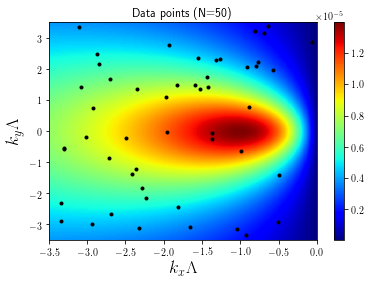

In [27]:
pcolor(X, Y, Z, cmap='jet')
cb=colorbar()
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plot(X_sub,Y_sub,'k.') 
xlabel(r'$k_x \Lambda$',fontsize=18)
ylabel(r'$k_y \Lambda$',fontsize=18)
ylim(-3.5,3.5)
title('Data points (N=%s)'%NSub)

In [28]:
NX_int_B = 5
NY_int_B = 8
XX_int_B = linspace(kx_min,kx_max,NX_int_B)
YY_int_B = linspace(ky_min,ky_max,NY_int_B)

In [29]:
NX_int = 100
NY_int = 200
XX_int = linspace(kx_min,kx_max,NX_int)
YY_int = linspace(ky_min,ky_max,NY_int)
[XX_int_grid,YY_int_grid] = meshgrid(XX_int,YY_int)

In [30]:
point= zeros((len(X_sub), 2))
for i in range(len(X_sub)):
    point[i,0]=X_sub[i]
    point[i,1]=Y_sub[i]
ZZ_near =griddata(point,Z_sub,(XX_int_grid,YY_int_grid),method='nearest')

ZZ_lin  =griddata(point,Z_sub,(XX_int_grid,YY_int_grid),method='linear')
subplot(121)
pcolor(XX_int,YY_int,ZZ_near,cmap='jet')
plot(X_sub,Y_sub,'k.')
xlabel('k_x \Lambda')
ylabel('k_y \Lambda')
title('nearest neighbour')
cb=colorbar(ticks=[0.15*10**(-5), 0.75*10**(-5), 1.35*10**(-5)],orientation='horizontal')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
ylim(-3.5,3.5)
subplot(122)
plt.imshow(ZZ_lin,extent=[-3.5,0,-3.5,3.5],cmap='jet',aspect=0.5)
plot(X_sub,Y_sub,'k.')
xlabel('k_x \Lambda')
ylabel('k_y \Lambda')
title('linear')
cb=colorbar(ticks=[0.3*10**(-5), 0.75*10**(-5), 1.2*10**(-5)],orientation='horizontal')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
ylim(-3.5,3.5)
show()

RuntimeError: latex was not able to process the following string:
b'k_x \\\\Lambda'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/lordhao/.matplotlib/tex.cache/3823e1620d399c5be1637efd0f55bb20.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/inputenc.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/utf8.def
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./3823e1620d399c5be1637efd0f55bb20.aux)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{10.000000}{12.500000}{\sffamily k_
                                                 x \Lambda}
No pages of output.
Transcript written on 3823e1620d399c5be1637efd0f55bb20.log.




<Figure size 432x288 with 4 Axes>

At least 100 data points are needed to recover the overall-pattern.